<a href="https://colab.research.google.com/github/guangyitan/Udemy-Unsupervised-Machine-Learning-with-2-Capstone-ML-Projects/blob/main/Dimensionality%20Reduction/Implementing_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount to google drive
from google.colab import drive 
drive.mount('/content/MyDrive')
project_path = '/content/MyDrive/My Drive/Colab Notebooks/Udemy/Dimensionality Reduction/'

#read the excel file
data = pd.read_csv(project_path + "Employee_Data.csv")
data.shape

Mounted at /content/MyDrive


(1470, 35)

In [3]:
# Visualise the dataset

# set num of columns to display
pd.set_option('max_columns', 35)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Removing Usless Columns

In [4]:
# look for useless columns

print("Number of Records in the Dataset: ", data.shape[0])
print("Number of Unique Values in EmployeeCount Column: ", data['EmployeeCount'].nunique())
print("Number of Unique Values in EmployeeNumber Column: ", data['EmployeeNumber'].nunique())
print("Number of Unique Values in Over18 Column: ", data['Over18'].nunique())
print("Number of Unique Values in StandardHours Column: ", data['StandardHours'].nunique())


Number of Records in the Dataset:  1470
Number of Unique Values in EmployeeCount Column:  1
Number of Unique Values in EmployeeNumber Column:  1470
Number of Unique Values in Over18 Column:  1
Number of Unique Values in StandardHours Column:  1


For EmployeeNumber Column, each row has unique values in all records.

For EmployeeCount, Over18 and StandardHours Columns, they have only one unique value in all records.

These columns are useless as they do not have any trends or patterns which can be used for predictive analytics.

In [5]:
# remove the useless columns from the dataset

data = data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1)
print("Number of Columns left: ", data.shape[1])

Number of Columns left:  31


In [6]:
# check for Missing values in the dataset
data.isnull().sum().sum()

0

There are no null/ missing values in the dataset

In [7]:
# check for columns with Object Data Type
data.select_dtypes('object').head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


# Encode Object Type Data into Numerical Type Data

In [8]:
# Encode the Object Type data into Numerical Data Type
# Attrition Column is excluded as it is our Target Column
# For Attrition Column, if 'Yes', employee will leave the organization in near future
# For Attrition Column, if 'NO', employee will not leave the organization in near future

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['BusinessTravel'] = le.fit_transform(data['BusinessTravel'])
data['Department'] = le.fit_transform(data['Department'])
data['EducationField'] = le.fit_transform(data['EducationField'])
data['Gender'] = le.fit_transform(data['Gender'])
data['JobRole'] = le.fit_transform(data['JobRole'])
data['MaritalStatus'] = le.fit_transform(data['MaritalStatus'])
data['OverTime'] = le.fit_transform(data['OverTime'])

# double check to ensure all object data type are converted
data.select_dtypes('object').columns

Index(['Attrition'], dtype='object')

In [9]:
# Split dataset into x and y

# axis = 0 means along row
# axis = 1 means along column
x = data.drop(['Attrition'], axis = 1)
y = pd.DataFrame(data['Attrition'], columns = ['Attrition'])

print("shape of x", x.shape)
print("shape of y", y.shape)

shape of x (1470, 30)
shape of y (1470, 1)


# Balancing the dataset using 'SMOTEENN' sampling technique

In [10]:
# check if the dataset is balance or not 
# check on the target column which is 'Attrition' Column

data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

From above we can see that the dataset has very large imbalance for **No** and **Yes** records

In [11]:
# balance the dataset distribution using 'SMOTEENN' Sampling Technique

from imblearn.combine import SMOTEENN

# defining the model
sn = SMOTEENN(random_state = 0)

x_temp = x.copy()
# train the model
sn.fit(x, np.array(y).ravel())

# Making the samples
x, y = sn.fit_sample(x, np.array(y).ravel())

#convert y from ndarray to dataframe
y = pd.DataFrame(y, columns = ['Attrition'])
x = pd.DataFrame(x)
x.columns = x_temp.columns

# Distribution of the dataset
y.value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Attrition
Yes          838
No           640
dtype: int64

In [12]:
print(y.shape)
print(np.array(y).shape)
print(np.array(y).ravel().shape)

(1478, 1)
(1478, 1)
(1478,)


# Splitting the Dataset into Testing and Training

In [13]:
# splitting the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape x_train: ", x_train.shape)
print("Shape x_test: ", x_test.shape)
print("Shape y_train: ", y_train.shape)
print("Shape y_test: ", y_test.shape)

Shape x_train:  (1182, 30)
Shape x_test:  (296, 30)
Shape y_train:  (1182, 1)
Shape y_test:  (296, 1)


In [14]:
x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1444,26,2,479,0,23,3,4,3,1,65,1,1,1,3,1,2333,23224,1,1,18,3,2,0,1,3,1,1,0,0,0
1470,24,1,205,1,3,2,4,1,1,80,2,1,2,1,1,2903,13052,1,0,18,3,2,0,1,2,2,1,0,0,0
56,51,2,684,1,6,3,1,1,1,51,3,5,5,3,2,19537,6462,7,0,13,3,3,0,23,5,3,20,18,15,15
1005,38,1,921,1,15,2,3,3,0,64,3,1,6,3,0,2662,20497,4,1,12,3,3,0,7,2,3,3,3,1,3
467,32,2,495,1,10,3,3,3,1,64,3,3,3,4,2,11244,21072,2,0,25,4,2,0,10,5,4,5,2,0,0


# t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. 

t-SNE gives us a feel or intuition of how the data is arranged in a high-dimensional space. 

t-SNE only works with data that it is give. It does not produce a model that allows us to apply new data into it.

In [16]:
# implementing PCA to find the value for n_components

from sklearn.manifold import TSNE

# define the TSNE model
# we set n_components = 2 as tsne generally works well with 2 components
tsne = TSNE(n_components = 2)

# use fit_transform as we want to learn the pattern in the training dataset
x_train_tsne = tsne.fit_transform(x_train)

## Visualising the t-SNE dataset

In [25]:
df_subset.head()

,x_train_tsne0,x_train_tsne1,Attrition
0,-38.052288,-13.094296,No
1,18.778231,-14.691185,NaN
2,-3.465720,26.325846,NaN
3,-28.839228,-20.588661,No
4,-18.383797,10.352646,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


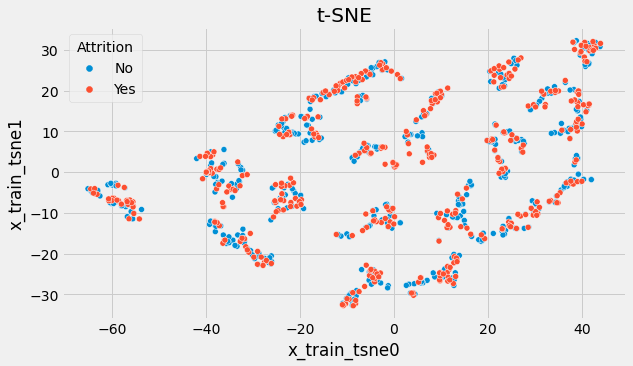

In [23]:
df_subset = pd.DataFrame()
df_subset['x_train_tsne0'] = x_train_tsne[:,0]
df_subset['x_train_tsne1'] = x_train_tsne[:,1]
df_subset['Attrition'] = y_train
plt.rcParams['figure.figsize'] = (9, 5)
plt.style.use('fivethirtyeight')

sns.scatterplot(df_subset['x_train_tsne0'], df_subset['x_train_tsne1'],
                hue = df_subset['Attrition'])

plt.title('t-SNE')
plt.show()